# KMEANS 
---

```julia
versioninfo() # -> v"1.11.1"
```

In [1]:
cd(@__DIR__)

In [2]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


It is a clustering algorithm that is used to partition an unlabeled dataset into a specified number of clusters.

Import librairies

In [3]:
using CSV, DataFrames
using Plots; # unicodeplots()
using MLJ

Load data from CSV file

In [4]:
df = CSV.read("../../Datasets/Mall_Customers.csv", DataFrame);
schema(df)
first(df, 5)

Row,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
,Int64,String7,Int64,Int64,Int64
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40


Features

In [5]:
income, ss = df[!, 4], df[!, 5];
X = hcat(ss, income);
typeof(X)

Matrix{Int64} (alias for Array{Int64, 2})

Take a look @ data

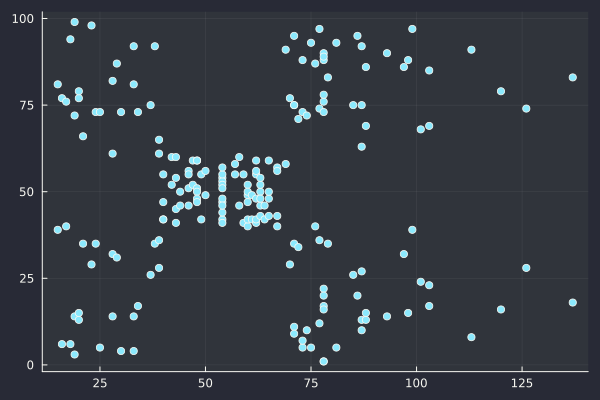

In [6]:
scatter(income, ss, legend=false)

Load & instantiate `KMeans` object

In [7]:
KMeans = @load KMeans pkg=Clustering
kmeans_ = KMeans(k=5)

[ Info: For silent loading, specify `verbosity=0`. 


import MLJClusteringInterface ✔


KMeans(
  k = 5, 
  metric = Distances.SqEuclidean(0.0), 
  init = :kmpp)

You may want to see [Clustering.jl](https://github.com/JuliaStats/Clustering.jl) and the unwrapped model type [`Clustering.KMeans`](@ref).

Train & regroup into clusters

In [8]:
kmeans = machine(kmeans_, X) |> fit!

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc Clustering.KMeans` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{AbstractMatrix{Count}}
│ 
│ fit_data_scitype(model) = Tuple{Table{<:AbstractVector{<:Continuous}}}
└ @ MLJBase ~/.julia/packages/MLJBase/7nGJF/src/machines.jl:237
[ Info: Training machine(KMeans(k = 5, …), …).


trained Machine; caches model-specific representations of data
  model: KMeans(k = 5, …)
  args: 
    1:	Source @868 ⏎ AbstractMatrix{Count}


Clusters & centroids

In [9]:
centroids = fitted_params(kmeans).centers

2×5 Matrix{Float64}:
 20.913   79.3636  49.5185  82.1282  17.1143
 26.3043  25.7273  55.2963  86.5385  88.2

Extract clusters values

In [10]:
y = report(kmeans).assignments
first(y, 5)

5-element Vector{Int64}:
 1
 2
 1
 2
 1

Scatter plots

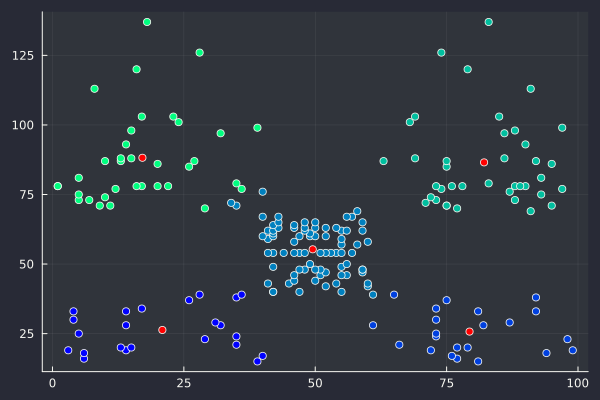

In [11]:
scatter(ss, income, marker_z=y, color=:winter, legend=false)
scatter!(centroids[1,:], centroids[2,:], color=:red, labels=['1', '2', '3', '4', '5'])